In [ ]:
import pandas as pd
from scipy.io import arff
import numpy as np

data_file="./german_credit.arff"
# If using other datasets then comment the above line and uncomment one of the following two lines
# data_file="bank.arff"
# data_file="churn.arff"
data=arff.loadarff(data_file)
# print(data[0])
df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    # making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')
# Look at loaded data and data types
print(df.dtypes)

In [1]:
! pip install -U imbalanced-learn

     -------------------------------------- 199.3/199.3 kB 2.0 MB/s eta 0:00:00


In [109]:
x = df.drop(['Creditability'], axis=1)
y = df['Creditability']

In [110]:
y.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

<AxesSubplot:ylabel='Creditability'>

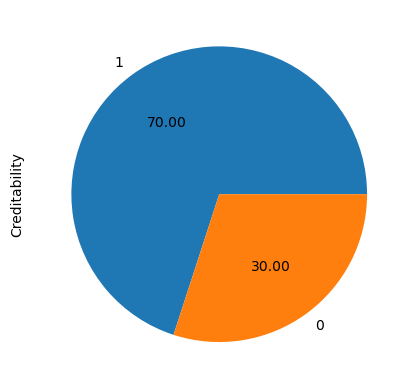

In [102]:
y.value_counts().plot.pie(autopct='%.2f')

In [12]:
# Random Undersampling

! pip install imblearn


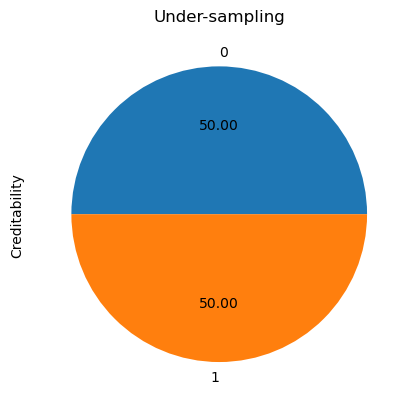

In [111]:
from imblearn.under_sampling import RandomUnderSampler

random_us = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
x_res, y_res = random_us.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [112]:
# Class distribution
y_res.value_counts()

0    300
1    300
Name: Creditability, dtype: int64

In [113]:
# decision tree
# 70% training and 30% test

from sklearn.model_selection import train_test_split

# no attributes removed
x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_res, y_res, test_size=0.3,random_state=1) 

# 3 attributes removed
# new_features = x_res.drop(columns=['Guarantors','Duration in Current address', 'No of dependents'])
# x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(new_features, y_res, test_size=0.3,random_state=1)

# 5 attributes removed
# new_features = x_res.drop(columns=['Guarantors','Duration in Current address', 'No of dependents','Type of apartment', 'Purpose'])
# x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(new_features, y_res, test_size=0.3,random_state=1) 

In [114]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x_res_train, y_res_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [115]:
y_pred = clf.predict(x_res_test)

from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_res_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[49 40]
 [19 72]]
TP:  72 , FP:  40 , TN:  49 , FN: 19


In [116]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_res_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.55      0.62        89
           1       0.64      0.79      0.71        91

    accuracy                           0.67       180
   macro avg       0.68      0.67      0.67       180
weighted avg       0.68      0.67      0.67       180



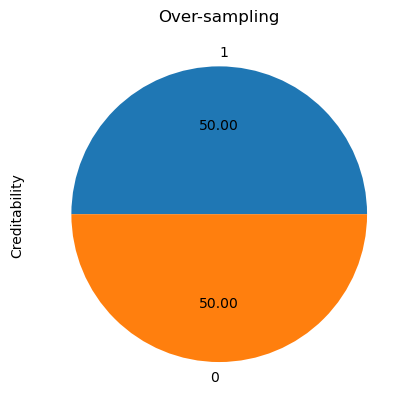

In [82]:
# Random Oversampling

from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(sampling_strategy=1) # Float
random_os = RandomOverSampler(sampling_strategy="not majority") # String
x_res, y_res = random_os.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [60]:
y_res.value_counts()

1    700
0    700
Name: Creditability, dtype: int64

In [68]:
# decision tree

# no attributes removed
# x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_res, y_res, test_size=0.3,random_state=1) 

# 3 attributes removed
# new_features = x_res.drop(columns=['Guarantors','Duration in Current address', 'No of dependents'])
# x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(new_features, y_res, test_size=0.3,random_state=1) 

# 5 attributes removed
new_features = x_res.drop(columns=['Guarantors','Duration in Current address', 'No of dependents','Type of apartment', 'Purpose'])
x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(new_features, y_res, test_size=0.3,random_state=1) 

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x_res_train, y_res_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [69]:
y_pred = clf.predict(x_res_test)

cf=confusion_matrix(y_res_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[150  58]
 [ 62 150]]
TP:  150 , FP:  58 , TN:  150 , FN: 62


In [70]:
print(classification_report(y_res_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       208
           1       0.72      0.71      0.71       212

    accuracy                           0.71       420
   macro avg       0.71      0.71      0.71       420
weighted avg       0.71      0.71      0.71       420



In [83]:
# Naive Bayes

# Random undersampling

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
print(y_res.value_counts())

# no Attributes removed
# x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_res, y_res, test_size=0.3,random_state=1) 

# 3 attributes removed
# new_features = x_res.drop(columns=['Guarantors','Duration in Current address', 'No of dependents'])
# x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(new_features, y_res, test_size=0.3,random_state=1) 

# 5 attributes removed
new_features = x_res.drop(columns=['Guarantors','Duration in Current address', 'No of dependents','Type of apartment', 'Purpose'])
x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(new_features, y_res, test_size=0.3,random_state=1) 

#Train the model using the training sets
nb.fit(x_res_train, y_res_train)

#Predict the response for test dataset
y_pred = nb.predict(x_res_test)
print(classification_report(y_res_test, y_pred))

1    700
0    700
Name: Creditability, dtype: int64
              precision    recall  f1-score   support

           0       0.61      0.50      0.55       208
           1       0.59      0.69      0.63       212

    accuracy                           0.60       420
   macro avg       0.60      0.60      0.59       420
weighted avg       0.60      0.60      0.59       420



In [58]:
# Random oversampling


from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()
print(y_res.value_counts())

# no Attributes removed
# x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_res, y_res, test_size=0.3,random_state=1) 

# 3 attributes removed
# new_features = x_res.drop(columns=['Guarantors','Duration in Current address', 'No of dependents'])

# 5 attributes removed
new_features = x_res.drop(columns=['Guarantors','Duration in Current address', 'No of dependents','Type of apartment', 'Purpose'])
x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(new_features, y_res, test_size=0.3,random_state=1) 

#Train the model using the training sets
nb.fit(x_res_train, y_res_train)

#Predict the response for test dataset
y_pred = nb.predict(x_res_test)

1    700
0    700
Name: Creditability, dtype: int64


In [ ]:
print ("Total Columns (including class)",len(df.columns))
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

In [59]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_res_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55       208
           1       0.59      0.70      0.64       212

    accuracy                           0.60       420
   macro avg       0.60      0.60      0.60       420
weighted avg       0.60      0.60      0.60       420



In [ ]:
# 3 Attributes removed: Guarantors, No of dependants, Duration in Current address